In [3]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import xyzservices.providers as xyz

In [4]:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

In [5]:
osm_power.shape

(43, 22)

In [6]:
osm_power.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 43 entries, ('way', 1073692887) to ('way', 1073692889)
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   barrier                   9 non-null      object  
 1   geometry                  43 non-null     geometry
 2   nodes                     43 non-null     object  
 3   landuse                   17 non-null     object  
 4   name                      42 non-null     object  
 5   operator                  42 non-null     object  
 6   plant:output:electricity  43 non-null     object  
 7   plant:source              43 non-null     object  
 8   power                     43 non-null     object  
 9   ref:US:EIA                42 non-null     object  
 10  source                    42 non-null     object  
 11  start_date                42 non-null     object  
 12  plant:method              21 non-null     object  
 13  ways     

In [7]:
osm_power.head()

barrier  \
element_type osmid                
way          1073692887     NaN   
             1110445420     NaN   
relation     6235170        NaN   
             6235171        NaN   
             9081854      fence   

                                                                  geometry  \
element_type osmid                                                           
way          1073692887  POLYGON ((-115.77802 32.82345, -115.77800 32.8...   
             1110445420  POLYGON ((-115.60828 32.79808, -115.60829 32.7...   
relation     6235170     MULTIPOLYGON (((-115.65587 32.66489, -115.6558...   
             6235171     MULTIPOLYGON (((-115.66543 32.66443, -115.6632...   
             9081854     MULTIPOLYGON (((-115.79601 32.77020, -115.7960...   

                                                                     nodes  \
element_type osmid                                                           
way          1073692887  [9849123929, 9849123928, 9849123927, 984912392...   
             1110445420  [10158553123, 10158553122, 10158553121, 101585...   
relation     6235170     [[[4196335329, 4196335331, 4196335320, 4196335...   
             6235171     [[[4196335313, 4196335315, 4196335301, 4196335...   
             9081854     [[[6119808448, 9099327011, 9099341170, 6119808...   

                            landuse                                name  \
element_type osmid                                                        
way          1073692887         NaN        Centinela State Prison Solar   
             1110445420         NaN                                 NaN   
relation     6235170     industrial          Imperial Valley Solar Farm   
             6235171            NaN  Imperial Solar Energy Center South   
             9081854            NaN   Imperial Solar Energy Center West   

                                           operator plant:output:electricity  \
element_type osmid                                                             
way          1073692887              Ecoplexus, Inc                     6 MW   
             1110445420                         NaN                      yes   
relation     6235170     Imperial Valley Solar, LLC                 199.9 MW   
             6235171            CSOLAR IV South LLC                 128.9 MW   
             9081854                        Tenaska                 148.7 MW   

                        plant:source  power ref:US:EIA  ...  plant:method  \
element_type osmid                                      ...                 
way          1073692887        solar  plant      64519  ...           NaN   
             1110445420        solar  plant        NaN  ...  photovoltaic   
relation     6235170           solar  plant      56917  ...  photovoltaic   
             6235171           solar  plant      57490  ...  photovoltaic   
             9081854           solar  plant      57491  ...  photovoltaic   

                                                                      ways  \
element_type osmid                                                           
way          1073692887                                                NaN   
             1110445420                                                NaN   
relation     6235170     [419597377, 419597382, 419597369, 419597370, 4...   
             6235171          [419597378, 419597368, 419597376, 419597383]   
             9081854                                [652921364, 652921363]   

                                 type   wikidata  \
element_type osmid                                 
way          1073692887           NaN        NaN   
             1110445420           NaN        NaN   
relation     6235170     multipolygon   Q6006932   
             6235171     multipolygon  Q16934775   
             9081854     multipolygon  Q38251293   

                                             wikipedia operator:short  \
element_type osmid                                                      

In [8]:
osm_power_counts = osm_power.value_counts(['plant:source']).reset_index(name="count")
osm_power_counts

plant:source  count
0        solar     25
1   geothermal     11
2      biomass      2
3          gas      2
4        hydro      2
5      gas;oil      1

<AxesSubplot: >

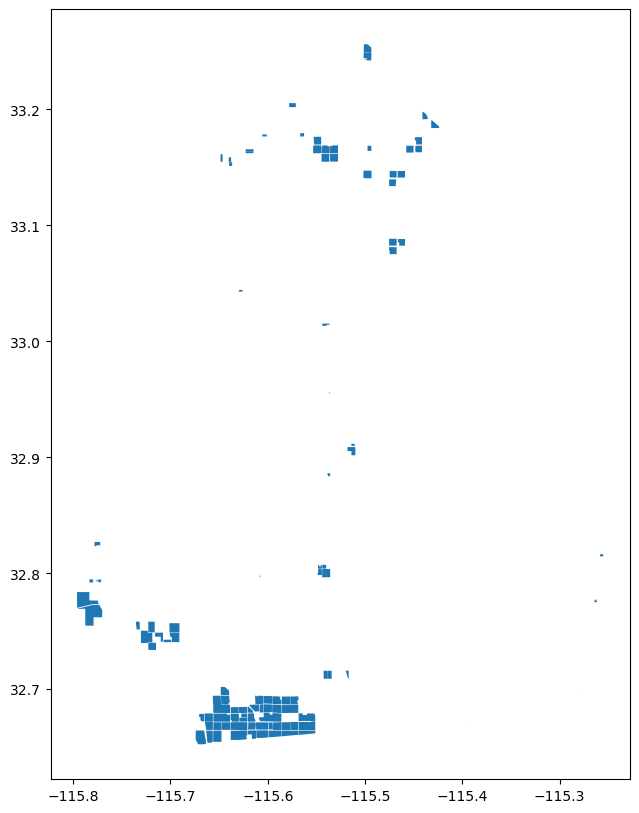

In [9]:
osm_power.plot(figsize=(10,10))

<AxesSubplot: >

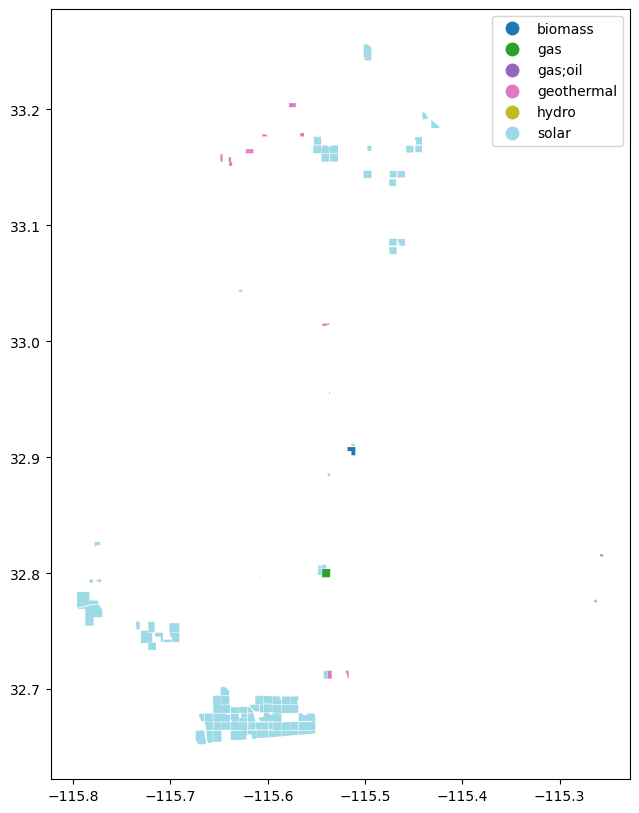

In [10]:
osm_power.plot(figsize=(10,10),
         column='plant:source',
         cmap='tab20',
         legend=True)

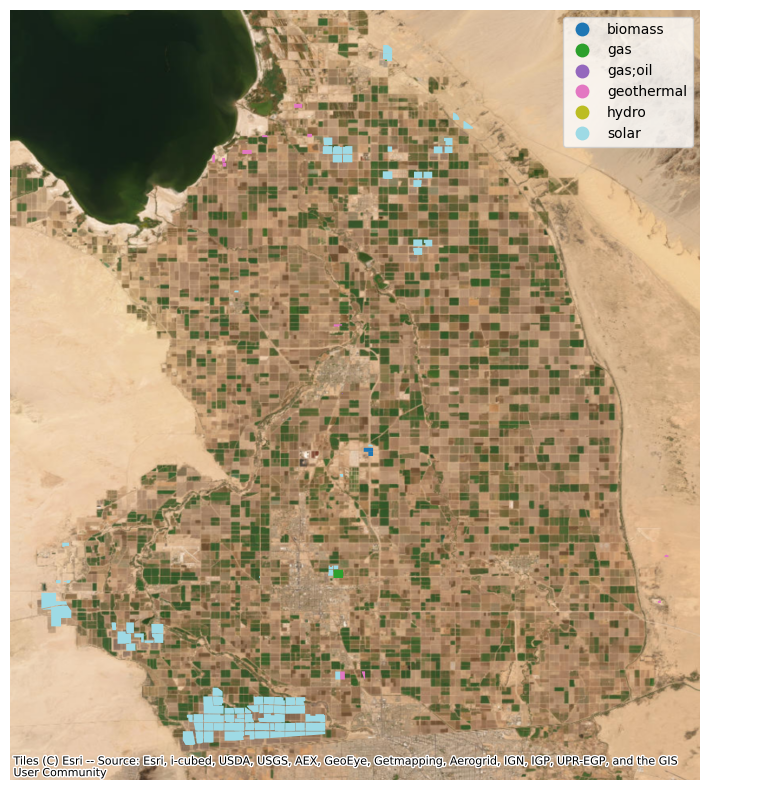

In [16]:
osm_power = osm_power.to_crs(epsg=4236)

fig, ax = plt.subplots(figsize=(10,10))

osm_power.plot(ax=ax,
         column='plant:source',
         cmap='tab20',
         legend=True)

ax.axis('off')

ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

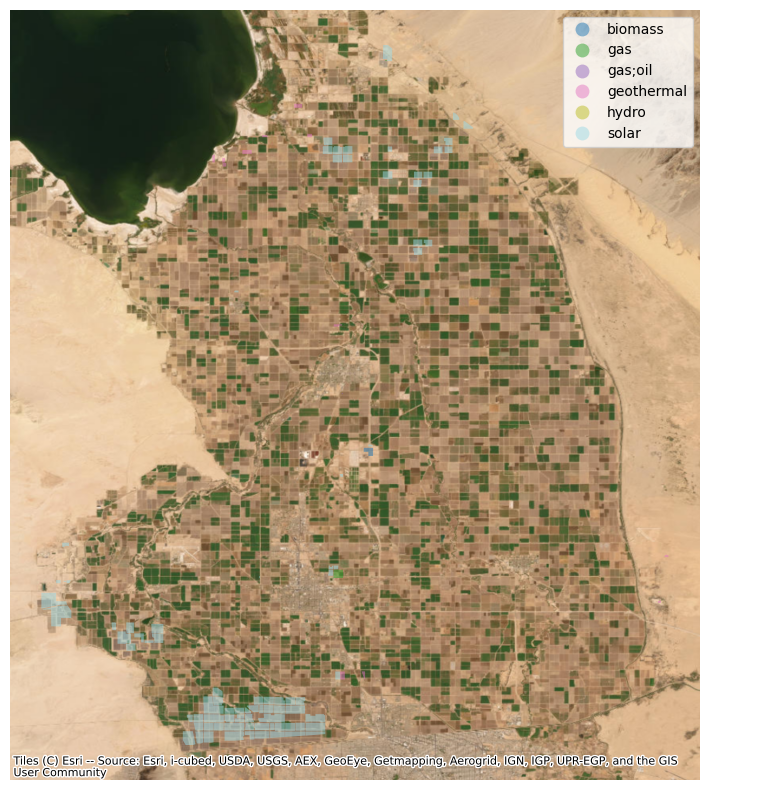

In [12]:
osm_power = osm_power.to_crs(epsg=4236)

fig, ax = plt.subplots(figsize=(10,10))

osm_power.plot(ax=ax,
         column='plant:source',
         cmap='tab20',
         legend=True,
         alpha=.5)

ax.axis('off')

ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

In [21]:
osm_water = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'waterway':True})

In [22]:
osm_water.shape

(367, 30)

In [24]:
osm_water.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 367 entries, ('node', 358813606) to ('way', 1073692869)
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ele                       3 non-null      object  
 1   gnis:county_id            3 non-null      object  
 2   gnis:created              3 non-null      object  
 3   gnis:feature_id           3 non-null      object  
 4   gnis:state_id             3 non-null      object  
 5   name                      159 non-null    object  
 6   waterway                  367 non-null    object  
 7   geometry                  367 non-null    geometry
 8   man_made                  1 non-null      object  
 9   operator                  1 non-null      object  
 10  source                    129 non-null    object  
 11  nodes                     335 non-null    object  
 12  wikidata                  41 non-null     object  
 13  name:es 

<AxesSubplot: >

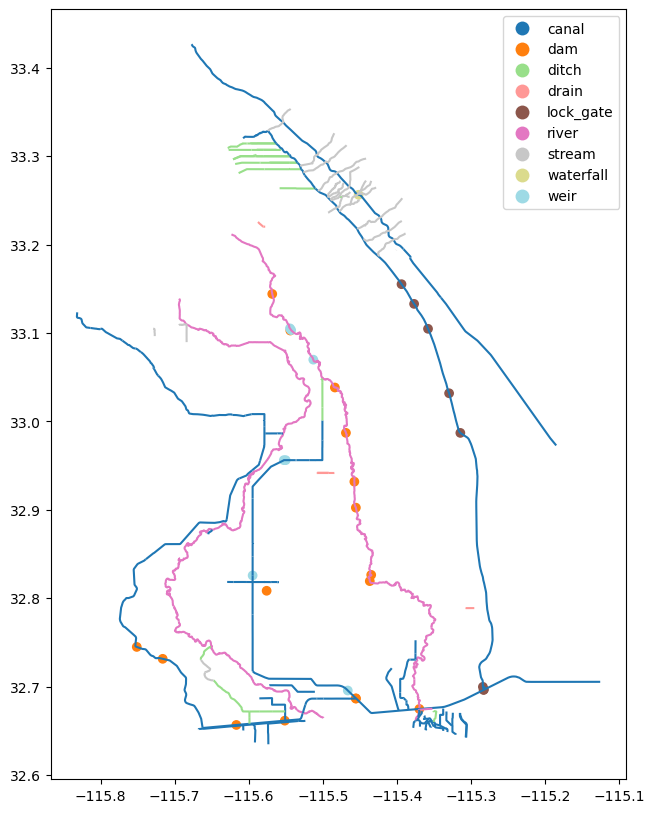

In [25]:
osm_water.plot(figsize=(10,10),
         column='waterway',
         cmap='tab20',
         legend=True)

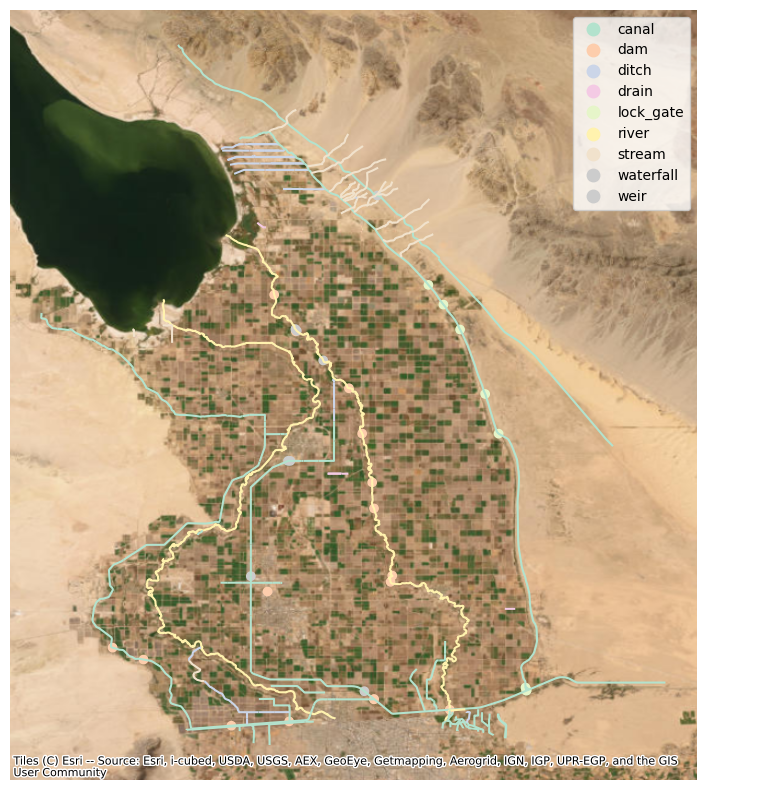

In [28]:
osm_water = osm_water.to_crs(epsg=4236)

fig, ax = plt.subplots(figsize=(10,10))

osm_water.plot(ax=ax,
         column='waterway',
         cmap='Pastel2',
         legend=True)

ax.axis('off')

ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

In [29]:
osm_quarry = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'landuse':'quarry'})

In [30]:
osm_quarry.shape

(4, 12)

In [34]:
osm_quarry.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 4 entries, ('node', 369172457) to ('node', 585365376)
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   addr:state         1 non-null      object  
 1   ele                1 non-null      object  
 2   gnis:county_name   1 non-null      object  
 3   gnis:created       1 non-null      object  
 4   gnis:feature_id    1 non-null      object  
 5   gnis:feature_type  1 non-null      object  
 6   landuse            4 non-null      object  
 7   name               3 non-null      object  
 8   wikidata           1 non-null      object  
 9   geometry           4 non-null      geometry
 10  man_made           2 non-null      object  
 11  nodes              1 non-null      object  
dtypes: geometry(1), object(11)
memory usage: 835.0+ bytes


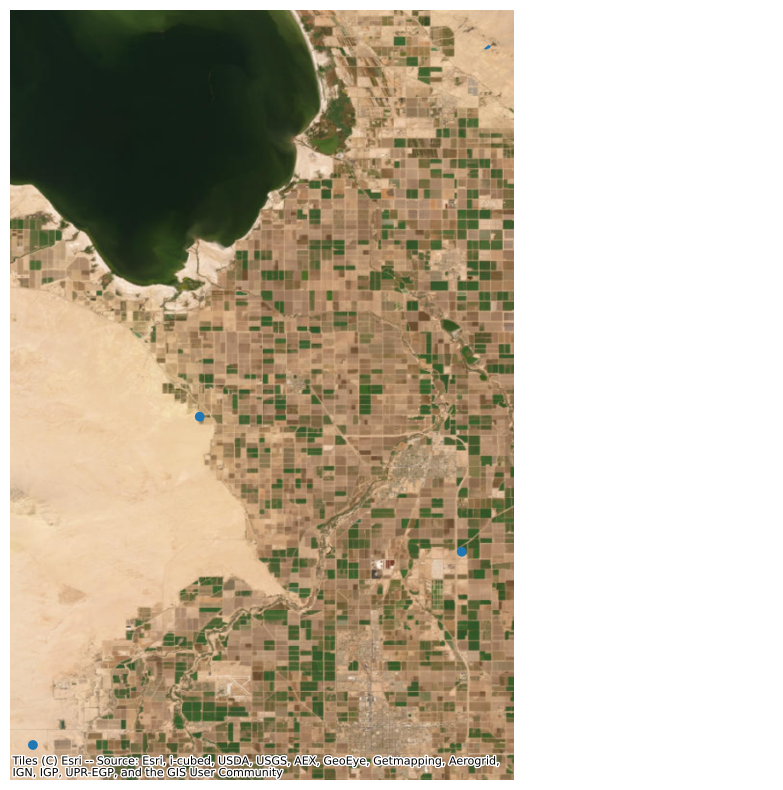

In [38]:
osm_quarry = osm_quarry.to_crs(epsg=4236)

fig, ax = plt.subplots(figsize=(10,10))

osm_quarry.plot(ax=ax,
         column='landuse',
         cmap='tab20')

ax.axis('off')

ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

In [39]:
osm_quarry

addr:state  ele gnis:county_name gnis:created  \
element_type osmid                                                      
node         369172457          CA   12         Imperial   05/08/1996   
             585365370         NaN  NaN              NaN          NaN   
way          1137992576        NaN  NaN              NaN          NaN   
node         585365376         NaN  NaN              NaN          NaN   

                        gnis:feature_id gnis:feature_type landuse  \
element_type osmid                                                  
node         369172457          1693423              Mine  quarry   
             585365370              NaN               NaN  quarry   
way          1137992576             NaN               NaN  quarry   
node         585365376              NaN               NaN  quarry   

                                        name   wikidata  \
element_type osmid                                        
node         369172457      Wixon Gravel Pit  Q49459314   
             585365370   El Centro Aggregate        NaN   
way          1137992576                  NaN        NaN   
node         585365376      Brawley Limekiln        NaN   

                                                                  geometry  \
element_type osmid                                                           
node         369172457                         POINT (-115.81116 32.78028)   
             585365370                         POINT (-115.69220 33.01437)   
way          1137992576  POLYGON ((-115.48933 33.27697, -115.48622 33.2...   
node         585365376                         POINT (-115.50538 32.91806)   

                        man_made  \
element_type osmid                 
node         369172457       NaN   
             585365370      mine   
way          1137992576      NaN   
node         585365376      mine   

                                                                     nodes  
element_type osmid                                                          
node         369172457                                                 NaN  
             585365370                                                 NaN  
way          1137992576  [10607630653, 10607630652, 10607630651, 106076...  
node         585365376                                                 NaN